# Proyecto de Modelos de Optimización - Función de Rosenbrock modificada

Universidad de La Habana - Facultad de Matemática y Computación

**Ariel González Gómez** (C-312)

## Preparación de entorno

In [356]:
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## Función de Rosenbrock modificada

In [357]:
# Define la funcion modificada de Rosenbrock que toma un solo argumento (x), que es una tupla o lista de dos valores
def rosenbrock_modified(x):
    x1, x2 = x  # Desempaqueta el array de entrada en x1 y x2
    # Implementa la formula revisada para la funcion modificada de Rosenbrock
    return 74 + 100 * (x2 + x1**2)**2 + (1 - x1**2) - 400 * np.exp(-((x1 + 1)**2 + (x2 + 1)**2)/0.1)


## Visualización

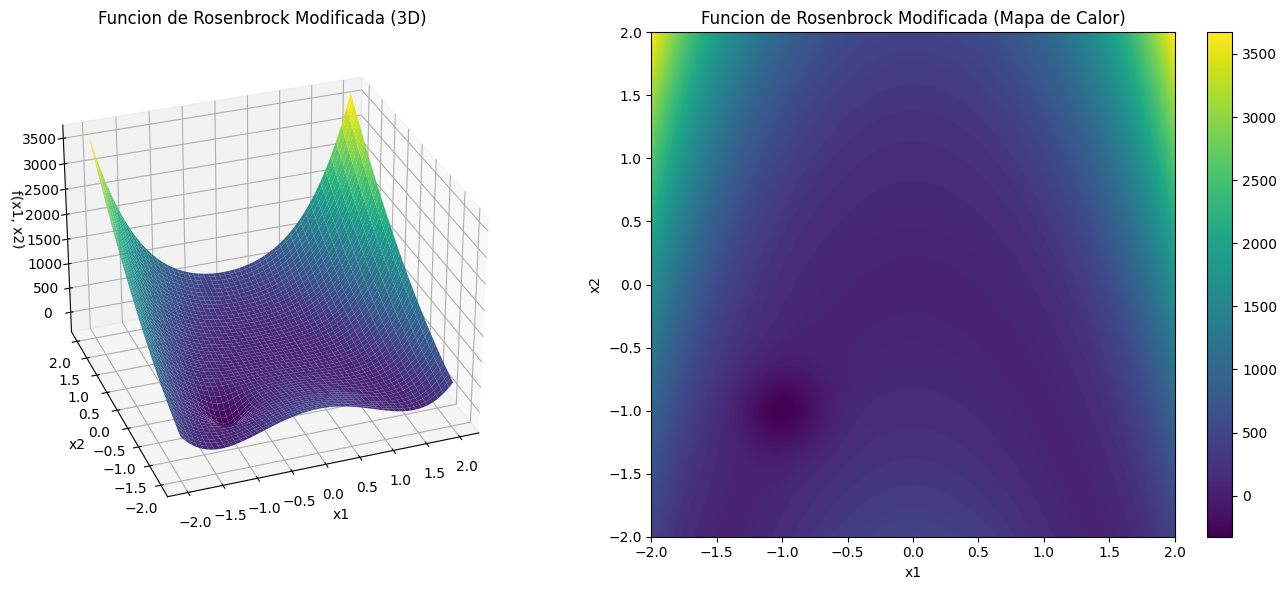

In [358]:
# Crear una malla para la visualizacion
x1 = np.linspace(-2, 2, 200)  # Aumenta la resolucion para un mapa de calor mas suave
x2 = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1, x2)

# Calcular los valores de la funcion para cada punto de la malla
Z = np.zeros(X1.shape)  # Crear una matriz para almacenar los valores calculados

for i in range(X1.shape[0]):  # Iterar sobre las filas
    for j in range(X1.shape[1]):  # Iterar sobre las columnas
        Z[i, j] = rosenbrock_modified((X1[i, j], X2[i, j]))  # Aplicar la funcion a cada par (x1, x2)

# Grafico 3D
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X1, X2, Z, cmap=cm.viridis)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Funcion de Rosenbrock Modificada (3D)')
# Ajustar angulo de vision (en grados)
ax.view_init(elev=30, azim=250)  # Cambia estos valores para experimentar

# Mapa de calor 2D (Suave)
ax2 = fig.add_subplot(1, 2, 2)
heatmap = ax2.imshow(Z, cmap=cm.viridis, extent=[-2, 2, -2, 2], origin='lower', aspect='auto')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Funcion de Rosenbrock Modificada (Mapa de Calor)')
fig.colorbar(heatmap, ax=ax2)  # Agrega una barra de color para mostrar la escala de valores

plt.tight_layout()  # Ajusta el diseño para que no haya superposiciones
plt.show()  # Muestra los graficos


## Algoritmos de Optimización

### Métodos clásicos

In [359]:
# Funcion de gradiente de la funcion modificada de Rosenbrock
def rosenbrock_modified_gradient(x):
    x1, x2 = x
    grad_x1 = 400*x1*(x1**2+x2) - 2*x1 + 8000*(x1+1)*np.exp(-10*(x1+1)**2 - 10*(x2+1)**2)
    grad_x2 = 200*x1**2 + 200*x2 + 8000*(x2+1)*np.exp(-10*(x1+1)**2 - 10*(x2+1)**2)
    return np.array([grad_x1, grad_x2])

# Inicializar el punto de partida y límites
x0 = np.array([0,0])
bounds=[(-2, 2), (-2, 2)]

#### Descenso Máximo (_Gradient Descent_)

In [360]:
def gradient_descent(grad_func, x0, bounds, lr=0.001, max_iter=1000):
    x = x0
    for i in range(max_iter):
        grad = grad_func(x)
        x = x - lr * grad
        # Limitar x dentro de los bordes especificados
        x = np.clip(x, bounds[0][0], bounds[0][1])
        x = np.clip(x, bounds[1][0], bounds[1][1])
        if np.linalg.norm(grad) < 1e-6:
            break
    return x

def run_gradient_descent(x0):
    result = gradient_descent(rosenbrock_modified_gradient, x0, bounds=bounds)
    return result

# Ejecutar el descenso por gradiente con limites
start_time = time.time()
solution_gd = run_gradient_descent(x0)
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Descenso Maximo (Gradient Descent)')
print(f'Solucion hallada: x* = ({solution_gd[0]:.15f}, {solution_gd[1]:.15f}), f(x*) = {rosenbrock_modified(solution_gd):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')

Descenso Maximo (Gradient Descent)
Solucion hallada: x* = (-0.000052565750173, -0.000000085232503), f(x*) = 74.999999171907461
Tiempo de ejecucion: 0.061024 segundos


#### Algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS)

In [143]:
from scipy.optimize import minimize

def run_bfgs(x0):
    result = minimize(rosenbrock_modified, x0, method='L-BFGS-B', jac=rosenbrock_modified_gradient, bounds=bounds)
    return result.x

# Ejecutar el metodo BFGS
start_time = time.time()
solution_bfgs = run_bfgs(x0)
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS)')
print(f'Solucion hallada: x* = ({solution_bfgs[0]:.15f}, {solution_bfgs[1]:.15f}), f(x*) = {rosenbrock_modified(solution_bfgs):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')

Algoritmo de Broyden–Fletcher–Goldfarb–Shanno (BFGS)
Solucion hallada: x* = (-0.000000166558930, -0.000000166558930), f(x*) = 74.999999175535805
Tiempo de ejecucion: 0.000000 segundos


#### Método de Región de Confianza

In [144]:
from scipy.optimize import minimize

def run_trust_region(x0):
    result = minimize(rosenbrock_modified, x0, method='trust-constr', jac=rosenbrock_modified_gradient, bounds=bounds)
    return result.x

# Ejecutar el Metodo de Region de Confianza
start_time = time.time()
solution_trust = run_trust_region(x0)
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Metodo de Region de Confianza')
print(f'Solucion hallada: x* = ({solution_trust[0]:.15f}, {solution_trust[1]:.15f}), f(x*) = {rosenbrock_modified(solution_trust):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')

Metodo de Region de Confianza
Solucion hallada: x* = (-1.000227822774938, -1.000011114443023), f(x*) = -326.000227825111494
Tiempo de ejecucion: 2.307047 segundos


#### Método Nelder-Mead (Simplex)

In [149]:
from scipy.optimize import minimize

# Definicion de la funcion modificada de Rosenbrock con penalizacion para manejar restricciones
def rosenbrock_modified_penalized(x):
    x1, x2 = x
    # Penalizacion por estar fuera de los limites
    penalty = 0
    if x1 < bounds[0][0] or x1 > bounds[0][1] or x2 < bounds[1][0] or x2 > bounds[1][1]:
        penalty = 1e10  # Gran penalizacion si esta fuera de los limites
    return rosenbrock_modified(x) + penalty

def run_nelder_mead(x0):
    result = minimize(rosenbrock_modified_penalized, x0=x0, method='Nelder-Mead', options={'xatol': 1e-8, 'fatol': 1e-8})
    return result.x

# Ejecutar Metodo Nelder-Mead (Simplex)
start_time = time.time()
solution_nelder_mead = run_nelder_mead(x0)
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Nelder-Mead (Simplex)')
print(f'Solucion hallada: x* = ({solution_nelder_mead[0]:.15f}, {solution_nelder_mead[1]:.15f}), f(x*) = {rosenbrock_modified(solution_nelder_mead):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')


Nelder-Mead (Simplex)
Solucion hallada: x* = (1.415898706924632, -1.999999999964812), f(x*) = 72.997505329285644
Tiempo de ejecucion: 0.014516 segundos


### Algoritmos Evolutivos

#### Evolución Diferencial (_Differential Evolution_ (DE))

In [153]:
from scipy.optimize import differential_evolution

def run_differential_evolution(x0=None):  # No necesita punto inicial
    result = differential_evolution(rosenbrock_modified, bounds)
    return result.x

# Ejecutar Evolucion Diferencial
start_time = time.time()
solution_de = run_differential_evolution()
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Metodo de Evolucion Diferencial')
print(f'Solucion hallada: x* = ({solution_de[0]:.15f}, {solution_de[1]:.15f}), f(x*) = {rosenbrock_modified(solution_de):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')

Metodo de Evolucion Diferencial
Solucion hallada: x* = (-1.000227828316512, -1.000011119262285), f(x*) = -326.000227825111267
Tiempo de ejecucion: 0.057997 segundos


#### Algoritmo genético (_Genetic Algorithm_)

In [272]:
import random
from deap import base, creator, tools, algorithms

def run_genetic_algorithm(x0=None):
    # Crear el tipo de problema de minimizacion
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    # Funcion para generar un individuo (solucion)
    def generate_individual():
        return [random.uniform(bounds[0][0], bounds[0][1]), random.uniform(bounds[1][0], bounds[1][1])]

    # Definir la funcion de evaluacion usando la funcion modificada de Rosenbrock
    def evaluate(individual):
        x1, x2 = individual
        return rosenbrock_modified([x1, x2]),

    # Configuracion de los operadores geneticos
    toolbox = base.Toolbox()
    toolbox.register("individual", tools.initIterate, creator.Individual, generate_individual)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluate)

    # Parametros del algoritmo genetico
    population_size = 100
    num_generations = 100
    mutation_prob = 0.2
    crossover_prob = 0.5

    # Crear la poblacion inicial
    population = toolbox.population(n=population_size)
    algorithms.eaSimple(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob, ngen=num_generations, verbose=False)
    
    # Obtener la mejor solucion
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual

# Aplicar el algoritmo genetico
start_time = time.time()
solution_ga = run_genetic_algorithm()
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Algoritmo genetico (Genetic Algorithm)')
print(f'Solucion hallada: x* = ({solution_ga[0]:.15f}, {solution_ga[1]:.15f}), f(x*) = {rosenbrock_modified(solution_ga):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')


Algoritmo genetico (Genetic Algorithm)
Solucion hallada: x* = (-1.000227822423090, -1.000011114025018), f(x*) = -326.000227825111494
Tiempo de ejecucion: 0.241072 segundos


### Optimización Basada en Población

#### Algoritmo de Enjambre de Partículas (_Particle Swarm Optimization_ (PSO))

In [211]:
from pyswarm import pso

def run_pso(x0=None):  # No necesita punto inicial
    lb = [bounds[0][0], bounds[1][0]]
    ub = [bounds[0][1], bounds[1][1]]
    xopt, _ = pso(rosenbrock_modified, lb, ub)
    return xopt

# Ejecutar PSO
start_time = time.time()
solution_pso = run_pso()
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Particle Swarm Optimization (PSO)')
print(f'Solucion hallada: x* = ({solution_pso[0]:.15f}, {solution_pso[1]:.15f}), f(x*) = {rosenbrock_modified(solution_pso):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')


Stopping search: Swarm best objective change less than 1e-08
Particle Swarm Optimization (PSO)
Solucion hallada: x* = (-1.000223715742451, -1.000013786654727), f(x*) = -326.000227717238204
Tiempo de ejecucion: 0.109498 segundos


#### _Covariance Matrix Adaptation Evolution Strategy_ (CMA-ES)

In [232]:
import cma

def run_cma_es(x0):
    # sigma0 es la desviacion inicial (amplitud de busqueda)
    sigma0 = 0.5

    # Crear la funcion adaptada a CMA-ES
    es = cma.CMAEvolutionStrategy(x0, sigma0, {'bounds': [[bounds[0][0], bounds[1][0]], [bounds[0][1], bounds[1][1]]]})
    
    # Extraer mejor resultado
    result = es.optimize(rosenbrock_modified).best.x
    return result

# Optimizacion
start_time = time.time()
result_cma_es = run_cma_es(x0)
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Covariance Matrix Adaptation - Evolution Strategy (CMA-ES))')
print(f'Solucion hallada: x* = ({result_cma_es[0]:.15f}, {result_cma_es[1]:.15f}), f(x*) = {rosenbrock_modified(result_cma_es):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')


(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=720888, Fri Sep  6 12:33:39 2024)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]


    1      6 7.676696966207817e+01 1.0e+00 4.17e-01  4e-01  4e-01 0:00.0
    2     12 7.487434777119314e+01 1.1e+00 3.09e-01  2e-01  3e-01 0:00.0
    3     18 7.495240892151260e+01 1.2e+00 2.48e-01  2e-01  2e-01 0:00.0
  100    600 -3.260002278251115e+02 1.9e+00 5.66e-06  1e-09  1e-09 0:00.2
  104    624 -3.260002278251114e+02 1.5e+00 4.87e-06  7e-10  9e-10 0:00.2
Covariance Matrix Adaptation - Evolution Strategy (CMA-ES))
Solucion hallada: x* = (-1.000227823119231, -1.000011114600786), f(x*) = -326.000227825111494
Tiempo de ejecucion: 1.117885 segundos


### Algoritmos de Búsqueda Estocástica

#### Recocido Simulado (_Simulated annealing_ (SA))

In [237]:
from scipy.optimize import dual_annealing

def run_simulated_annealing(x0=None):  # No necesita punto inicial
    result = dual_annealing(rosenbrock_modified, bounds)
    return result.x

# Ejecutar Recocido Simulado (Dual Annealing)
start_time = time.time()
result_sa = run_simulated_annealing()
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Recocido Simulado (SA)')
print(f'Solucion hallada: x* = ({result_sa[0]:.15f}, {result_sa[1]:.15f}), f(x*) = {rosenbrock_modified(result_sa):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')


Recocido Simulado (SA)
Solucion hallada: x* = (-1.000227777673769, -1.000011145965630), f(x*) = -326.000227825097852
Tiempo de ejecucion: 0.234062 segundos


#### _Basin Hopping_

In [259]:
from scipy.optimize import basinhopping

def run_basin_hopping(x0):
    # Definir minimizador local (BFGS)
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds}
    result = basinhopping(rosenbrock_modified, x0, minimizer_kwargs=minimizer_kwargs, niter=100)
    return result.x

# Ejecutar Basin Hopping
start_time = time.time()
solution_bh = run_basin_hopping(x0)
end_time = time.time()

# Calcular el tiempo transcurrido
execution_time = end_time - start_time

# Imprimir la solucion y el tiempo de ejecucion
print(f'Basin Hopping')
print(f'Solucion hallada: x* = ({solution_bh[0]:.15f}, {solution_bh[1]:.15f}), f(x*) = {rosenbrock_modified(solution_bh):.15f}')
print(f'Tiempo de ejecucion: {execution_time:.6f} segundos')


Basin Hopping
Solucion hallada: x* = (-1.000227821033224, -1.000011112916367), f(x*) = -326.000227825111438
Tiempo de ejecucion: 0.279207 segundos


In [294]:
# Generar un punto inicial aleatorio en el rango [-2, 2]
def random_initial_point():
    return np.random.uniform(-2, 2, size=2)

# Función para medir el rendimiento
def evaluate_algorithm(algorithm, n_runs=10):
    all_solutions = []  # Guardará todas las soluciones obtenidas
    times = []
    for i in range(n_runs):
        x0 = random_initial_point()  # Punto inicial aleatorio
        start_time = time.time()
        solution = algorithm(x0)
        end_time = time.time()
        execution_time = end_time - start_time
        solution_value = rosenbrock_modified(solution)

        all_solutions.append(solution_value)  # Guardar la solución obtenida
        times.append(execution_time)

    return {
        "all_solutions": all_solutions,  # Lista de todas las soluciones obtenidas
        "all_times": times,  # Lista de todos los tiempos de ejecución
        "best": np.min(all_solutions),
        "worst": np.max(all_solutions),
        "mean": np.mean(all_solutions),
        "std_dev": np.std(all_solutions),
        "avg_time": np.mean(times)
    }


# Ejecutar y comparar todos los algoritmos
opt_algorithms = {
    "Gradient Descent": run_gradient_descent,
    "BFGS": run_bfgs,
    "Trust Region": run_trust_region,
    "Nelder-Mead": run_nelder_mead,
    "Differential Evolution": run_differential_evolution,
    "Genetic Algorithm": run_genetic_algorithm,
    "PSO": run_pso,
    "CMA-ES": run_cma_es,
    "Simulated Annealing": run_simulated_annealing,
    "Basin Hopping": run_basin_hopping
}

n_runs = 20  # Número de ejecuciones por algoritmo
results = {}

for name, algorithm in opt_algorithms.items():
    print(f"Evaluating {name}...")
    results[name] = evaluate_algorithm(algorithm, n_runs)


Evaluating Gradient Descent...
Evaluating BFGS...
Evaluating Trust Region...
Evaluating Nelder-Mead...
Evaluating Differential Evolution...
Evaluating Genetic Algorithm...


c:\Users\HNATA\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\HNATA\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Evaluating PSO...
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stoppi

In [339]:
global_min = 1000000000000

# Imprimir resultados
for name, stats in results.items():
    global_min = min(global_min, stats['best'])
    print(f"\nAlgorithm: {name}")
    print(f"  Best Solution: {stats['best']:.15f}")
    print(f"  Worst Solution: {stats['worst']:.15f}")
    print(f"  Mean Solution: {stats['mean']:.15f}")
    print(f"  Std Dev of Solutions: {stats['std_dev']:.15f}")
    print(f"  Average Execution Time: {stats['avg_time']:.15f} seconds")

print()
print(f"Global minimum: {global_min:.15f}")


Algorithm: Gradient Descent
  Best Solution: 72.997500000000002
  Worst Solution: 74.978270696727506
  Mean Solution: 74.330875074664007
  Std Dev of Solutions: 0.581587810469972
  Average Execution Time: 0.052380084991455 seconds

Algorithm: BFGS
  Best Solution: -326.000227825111438
  Worst Solution: 73.433430666783252
  Mean Solution: -146.414583437930304
  Std Dev of Solutions: 198.539427598185284
  Average Execution Time: 0.001103937625885 seconds

Algorithm: Trust Region
  Best Solution: -326.000227825111494
  Worst Solution: 72.998304032189722
  Mean Solution: -106.551388864023735
  Std Dev of Solutions: 198.498943503689304
  Average Execution Time: 0.265096449851990 seconds

Algorithm: Nelder-Mead
  Best Solution: -326.000227825111438
  Worst Solution: 72.997500000000130
  Mean Solution: -226.250956790353030
  Std Dev of Solutions: 172.770805451359053
  Average Execution Time: 0.005997836589813 seconds

Algorithm: Differential Evolution
  Best Solution: -326.000227825111324
  

In [361]:
# Función para analizar la resiliencia a mínimos locales
def analyze_resilience(results, global_min=-326, tolerance=1e-5):
    resilience = {}
    for name, res in results.items():
        close_to_global = 0
        # Iteramos sobre todas las soluciones obtenidas en todas las ejecuciones
        for solution_value in res["all_solutions"]:
            if abs(solution_value - global_min) < tolerance:
                close_to_global += 1
        resilience[name] = close_to_global / len(res["all_solutions"])  # Proporción de veces que se acerca al mínimo global
    return resilience

# Análisis de resiliencia a mínimos locales
resilience_scores = analyze_resilience(results, global_min=global_min)
print("\nResilience to Local Minima:")
print(resilience_scores)


Resilience to Local Minima:
{'Gradient Descent': 0.0, 'BFGS': 0.55, 'Trust Region': 0.45, 'Nelder-Mead': 0.75, 'Differential Evolution': 1.0, 'Genetic Algorithm': 1.0, 'PSO': 1.0, 'CMA-ES': 0.8, 'Simulated Annealing': 1.0, 'Basin Hopping': 1.0}


C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\2657173517.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(alg_names, rotation=45)


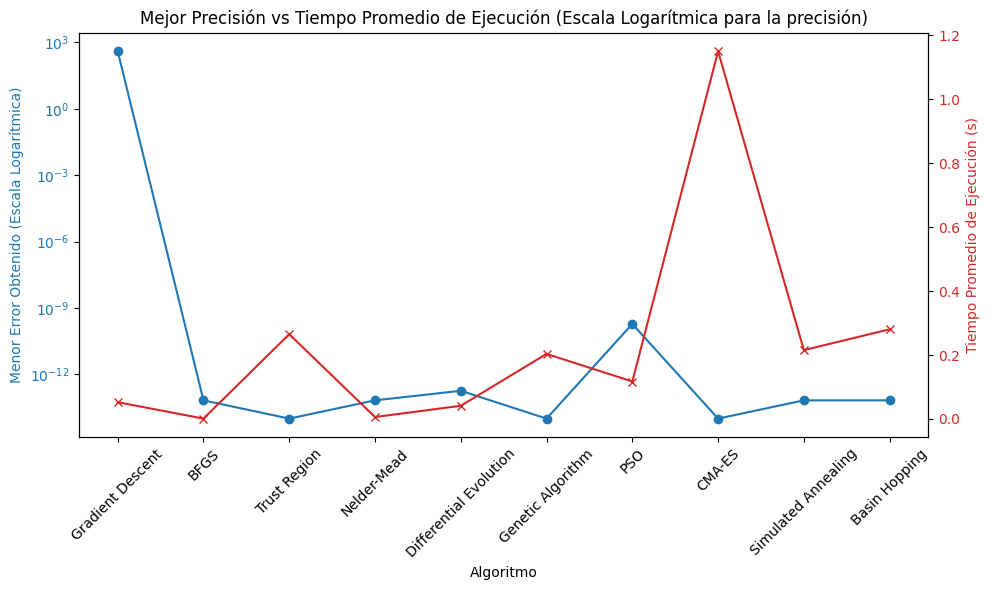

In [385]:
def plot_dual_axis_best_precision_vs_time_log(results, global_min):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    alg_names = list(results.keys())
    best_solutions = [res["best"] for res in results.values()]
    avg_times = [res["avg_time"] for res in results.values()]

    # Subtract global_min to avoid log(0), adding a small offset to handle negative results
    best_solutions_offset = [abs(bs - global_min) + 1e-14 for bs in best_solutions]

    # Plot best solution with a log scale
    color = 'tab:blue'
    ax1.set_xlabel('Algoritmo')
    ax1.set_ylabel('Menor Error Obtenido (Escala Logarítmica)', color=color)
    ax1.plot(alg_names, best_solutions_offset, color=color, marker='o', label='Mejor Solución')
    ax1.set_yscale('log')  # Apply log scale to best solution axis
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(alg_names, rotation=45)

    # Second axis for execution time
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Tiempo Promedio de Ejecución (s)', color=color)
    ax2.plot(alg_names, avg_times, color=color, marker='x', label='Tiempo Promedio de Ejecución')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Mejor Precisión vs Tiempo Promedio de Ejecución (Escala Logarítmica para la precisión)')
    fig.tight_layout()
    plt.show()

# Example usage
plot_dual_axis_best_precision_vs_time_log(results, global_min)

C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\1064750085.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(alg_names, rotation=45)


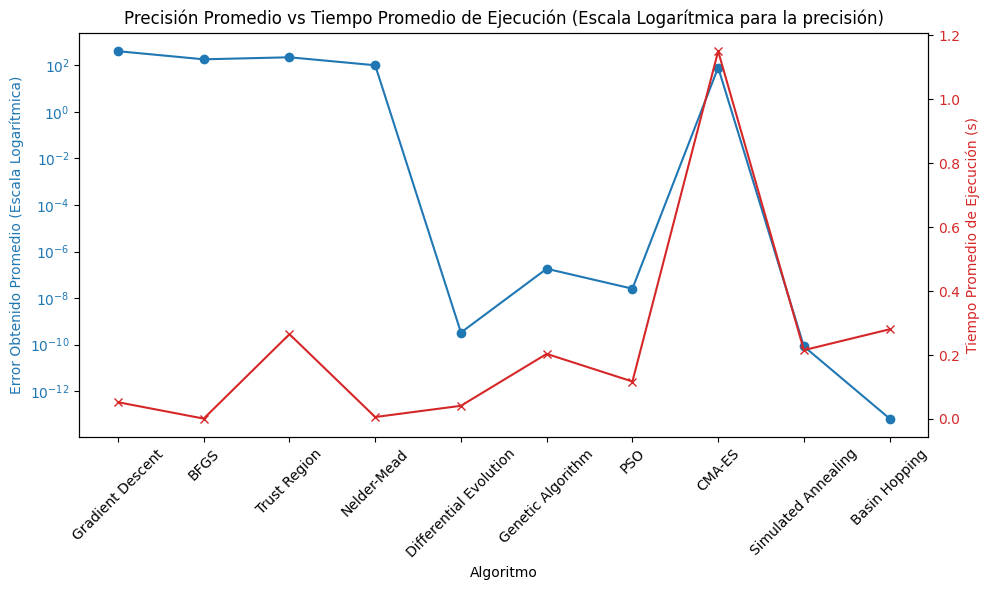

In [386]:
def plot_dual_axis_mean_precision_vs_time_log(results, global_min):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    alg_names = list(results.keys())
    best_solutions = [res["mean"] for res in results.values()]
    avg_times = [res["avg_time"] for res in results.values()]

    # Subtract global_min to avoid log(0), adding a small offset to handle negative results
    best_solutions_offset = [abs(bs - global_min) + 1e-14 for bs in best_solutions]

    # Plot best solution with a log scale
    color = 'tab:blue'
    ax1.set_xlabel('Algoritmo')
    ax1.set_ylabel('Error Obtenido Promedio (Escala Logarítmica)', color=color)
    ax1.plot(alg_names, best_solutions_offset, color=color, marker='o', label='Mejor Solución')
    ax1.set_yscale('log')  # Apply log scale to best solution axis
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(alg_names, rotation=45)

    # Second axis for execution time
    ax2 = ax1.twinx()  
    color = 'tab:red'
    ax2.set_ylabel('Tiempo Promedio de Ejecución (s)', color=color)
    ax2.plot(alg_names, avg_times, color=color, marker='x', label='Tiempo Promedio de Ejecución')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Precisión Promedio vs Tiempo Promedio de Ejecución (Escala Logarítmica para la precisión)')
    fig.tight_layout()
    plt.show()

# Example usage
plot_dual_axis_mean_precision_vs_time_log(results, global_min)

In [354]:
# Extract all values for each metric
best_solutions = [metrics['best'] for metrics in results.values()]
worst_solutions = [metrics['worst'] for metrics in results.values()]
mean_solutions = [metrics['mean'] for metrics in results.values()]
avg_times = [metrics['avg_time'] for metrics in results.values()]

# Helper functions to get the best, second best, and worst values
def get_best_second_best_worst(values):
    sorted_values = sorted(set(values))
    return sorted_values[0], sorted_values[1], sorted_values[-1]

# Compute best, second best, and worst values for each metric
best_values = {}
second_best_values = {}
worst_values = {}

best_values['best'], second_best_values['best'], worst_values['best'] = get_best_second_best_worst(best_solutions)
best_values['worst'], second_best_values['worst'], worst_values['worst'] = get_best_second_best_worst(worst_solutions)
best_values['mean'], second_best_values['mean'], worst_values['mean'] = get_best_second_best_worst(mean_solutions)
best_values['avg_time'], second_best_values['avg_time'], worst_values['avg_time'] = get_best_second_best_worst(avg_times)

# Print the dictionaries
print("Best Values:", best_values)
print("Second Best Values:", second_best_values)
print("Worst Values:", worst_values)

Best Values: {'best': -326.0002278251115, 'worst': -326.0002278251113, 'mean': -326.00022782511144, 'avg_time': 0.0011039376258850098}
Second Best Values: {'best': -326.00022782511144, 'worst': -326.0002278242352, 'mean': -326.0002278250273, 'avg_time': 0.005997836589813232}
Worst Values: {'best': 72.9975, 'worst': 74.9782706967275, 'mean': 74.33087507466401, 'avg_time': 1.150205373764038}


In [355]:
# Function to format values based on their rank
def format_value(value, category):
    if value == best_values[category]:
        return f'\\textcolor{{green}}{{{value:.15f}}}'
    elif value == second_best_values[category]:
        return f'\\underline{{{value:.15f}}}'
    elif value == worst_values[category]:
        return f'\\textcolor{{red}}{{{value:.15f}}}'
    else:
        return f'{value:.15f}'

# Generate LaTeX table
latex_code = r"""
\begin{table}[h!]
\centering
\footnotesize
\begin{adjustbox}{max width=\textwidth}
\begin{tabular}{|l|l|l|l|l|}
\hline
\textbf{Algoritmo} & \textbf{Mejor Solución} & \textbf{Peor Solución} & \textbf{Solución Media} & \textbf{Tiempo Promedio (s)} \\
\hline
"""

for algorithm, metrics in results.items():
    best = format_value(metrics['best'], 'best')
    worst = format_value(metrics['worst'], 'worst')
    mean = format_value(metrics['mean'], 'mean')
    avg_time = format_value(metrics['avg_time'], 'avg_time')
    latex_code += f"{algorithm} & {best} & {worst} & {mean} & {avg_time} \\\\\n\\hline\n"

latex_code += r"""
\end{tabular}
\end{adjustbox}
\caption{Resultados de los algoritmos de optimización.}
\label{tab:optim_results}
\end{table}
"""

print(latex_code)


\begin{table}[h!]
\centering
\footnotesize
\begin{adjustbox}{max width=\textwidth}
\begin{tabular}{|l|l|l|l|l|}
\hline
\textbf{Algoritmo} & \textbf{Mejor Solución} & \textbf{Peor Solución} & \textbf{Solución Media} & \textbf{Tiempo Promedio (s)} \\
\hline
Gradient Descent & \textcolor{red}{72.997500000000002} & \textcolor{red}{74.978270696727506} & \textcolor{red}{74.330875074664007} & 0.052380084991455 \\
\hline
BFGS & \underline{-326.000227825111438} & 73.433430666783252 & -146.414583437930304 & \textcolor{green}{0.001103937625885} \\
\hline
Trust Region & \textcolor{green}{-326.000227825111494} & 72.998304032189722 & -106.551388864023735 & 0.265096449851990 \\
\hline
Nelder-Mead & \underline{-326.000227825111438} & 72.997500000000130 & -226.250956790353030 & \underline{0.005997836589813} \\
\hline
Differential Evolution & -326.000227825111324 & -326.000227820604323 & -326.000227824779927 & 0.041150748729706 \\
\hline
Genetic Algorithm & \textcolor{green}{-326.000227825111494} & -32

C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\3180283490.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\3180283490.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\3180283490.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 0].set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\3180283490.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(algorithms, rotation=45, ha='right')
C:\Users\HNATA\AppData\Local\Temp\ipykernel_15112\3180283490.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2, 0].set_xticklabe

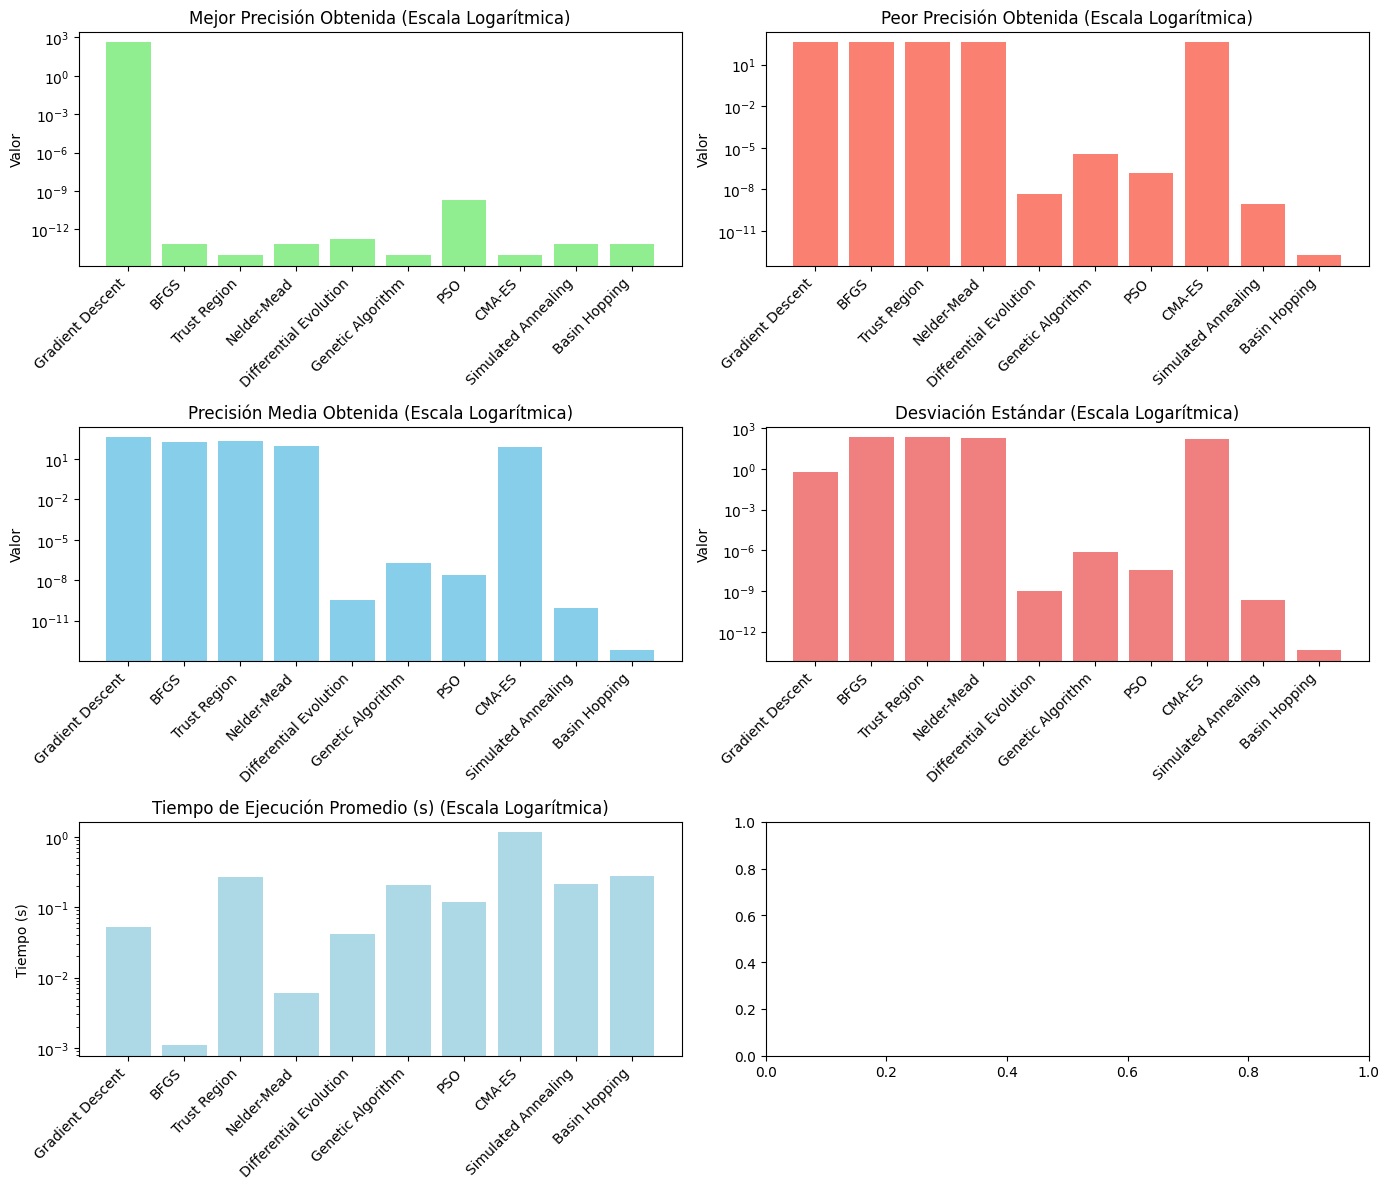

In [382]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo, reemplaza esto con tus resultados
# results = { ... }  # Tu diccionario 'results' aquí

algorithms = list(results.keys())
best_values = np.array([results[alg]['best'] for alg in algorithms])
worst_values = np.array([results[alg]['worst'] for alg in algorithms])
mean_values = np.array([results[alg]['mean'] for alg in algorithms])
std_dev_values = np.array([results[alg]['std_dev'] for alg in algorithms])
avg_time_values = np.array([results[alg]['avg_time'] for alg in algorithms])

# Configuración para las gráficas
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Gráfico de 'best' con escala logarítmica
axs[0, 0].bar(algorithms, np.abs(best_values - global_min) + 1e-14, color='lightgreen')
axs[0, 0].set_title('Mejor Precisión Obtenida (Escala Logarítmica)')
axs[0, 0].set_ylabel('Valor')
axs[0, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axs[0, 0].set_yscale('log')

# Gráfico de 'worst' sin escala logarítmica
axs[0, 1].bar(algorithms, np.abs(worst_values - global_min) + 1e-14, color='salmon')
axs[0, 1].set_title('Peor Precisión Obtenida (Escala Logarítmica)')
axs[0, 1].set_ylabel('Valor')
axs[0, 1].set_xticklabels(algorithms, rotation=45, ha='right')
axs[0, 1].set_yscale('log')

# Gráfico de 'mean' con escala logarítmica
axs[1, 0].bar(algorithms, np.abs(mean_values - global_min) + 1e-14, color='skyblue')
axs[1, 0].set_title('Precisión Media Obtenida (Escala Logarítmica)')
axs[1, 0].set_ylabel('Valor')
axs[1, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axs[1, 0].set_yscale('log')

# Gráfico de 'std_dev' con escala logarítmica
axs[1, 1].bar(algorithms, std_dev_values, color='lightcoral')
axs[1, 1].set_title('Desviación Estándar (Escala Logarítmica)')
axs[1, 1].set_ylabel('Valor')
axs[1, 1].set_xticklabels(algorithms, rotation=45, ha='right')
axs[1, 1].set_yscale('log')

# Gráfico de 'avg_time' con escala logarítmica
axs[2, 0].bar(algorithms, avg_time_values, color='lightblue')
axs[2, 0].set_title('Tiempo de Ejecución Promedio (s) (Escala Logarítmica)')
axs[2, 0].set_ylabel('Tiempo (s)')
axs[2, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axs[2, 0].set_yscale('log')

# Ajuste del espacio entre gráficos
plt.tight_layout()
plt.show()

